In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

## What we'll look into?

- Analysis
    - what part of the day I listen the most?
    - What part of the year I listened the most?
    - The top artists
    - The top tracks


In [445]:
#importing data
data = pd.read_json('StreamingHistory0.json')
data.head()

,endTime,artistName,trackName,msPlayed
0,2019-12-04 00:03,Daniel Caesar,Who Hurt You?,231964
1,2019-12-04 00:07,Daniel Caesar,Streetcar,246972
2,2019-12-04 00:13,Daniel Caesar,TOO DEEP TO TURN BACK,7063
3,2019-12-04 00:14,H.E.R.,Slide,62090
4,2019-12-04 00:18,Kendrick Lamar,"Bitch, Don’t Kill My Vibe - Remix",278520


In [446]:
data.shape

(8311, 4)

In [447]:
#creating a column with the total minute played
data['minPlayed'] = data.msPlayed / 60000
data.drop(columns = 'msPlayed',  inplace = True)

In [450]:
#total number of minutes listened in hours
data.minPlayed.sum()/3600

7.395626143518519

In [448]:
data.head()

,endTime,artistName,trackName,minPlayed
0,2019-12-04 00:03,Daniel Caesar,Who Hurt You?,3.866067
1,2019-12-04 00:07,Daniel Caesar,Streetcar,4.116200
2,2019-12-04 00:13,Daniel Caesar,TOO DEEP TO TURN BACK,0.117717
3,2019-12-04 00:14,H.E.R.,Slide,1.034833
4,2019-12-04 00:18,Kendrick Lamar,"Bitch, Don’t Kill My Vibe - Remix",4.642000


In [496]:
#top 15 artists
top10_artists = data.artistName.value_counts()[:15]
print(top10_artists)

Mac Miller            385
Ferrugem              246
The Weeknd            239
Daft Punk             191
Frank Ocean           187
Foo Fighters          185
Muse                  162
Cage The Elephant     155
Dua Lipa              152
Ariana Grande         141
Thiaguinho            137
Childish Gambino      127
Rex Orange County     124
Tyler, The Creator    123
Mac DeMarco           119
Name: artistName, dtype: int64


In [498]:
#top 15 tracks
top10_tracks = data.trackName.value_counts()[:15]
print(top10_tracks)

Good News                46
Circles                  37
Hands                    28
Backyard                 28
SUGAR                    23
In My Room               21
Complicated              21
Blue World               20
I Can See                19
NO HALO                  18
Redbone                  18
Blinding Lights          18
ARE WE STILL FRIENDS?    17
Alive                    17
TITLE TRACK              17
Name: trackName, dtype: int64


In [452]:
#converting endTime to datetime
data['endTime'] = pd.to_datetime(data['endTime'])

In [458]:
#creating a column for date, weekday and hour only
data['date'] = data['endTime'].dt.date
data['hour'] = data['endTime'].dt.hour
#data['weekday'] = pd.to_datetime(data['endTime'])
data['weekday'] = data['endTime'].dt.weekday

In [460]:
#checking for data types
data.dtypes

endTime       datetime64[ns]
artistName            object
trackName             object
minPlayed            float64
date                  object
hour                   int64
weekday                int64
dtype: object

Text(0.5, 1.0, 'Distribution of music listened in 2020')

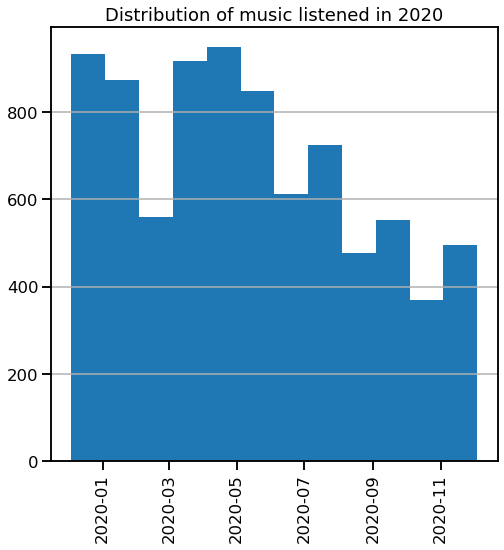

In [508]:
#taking a look at distribuition of listening in dates
plt.figure(figsize = (8,8))
plt.hist(data = data, x = 'date', bins = 12)
plt.xticks(rotation = 90)
plt.grid(True, axis = 'y')
plt.title('Distribution of music listened in 2020')

In [462]:
#filtering and creating another df 
days_hours = data.filter(['hour','weekday','minPlayed'])

In [463]:
#checking the process
days_hours

,hour,weekday,minPlayed
0,0,2,3.866067
1,0,2,4.116200
2,0,2,0.117717
3,0,2,1.034833
4,0,2,4.642000
...,...,...,...
8306,19,4,2.952267
8307,19,4,1.828117
8308,19,4,2.946433
8309,22,4,0.581650


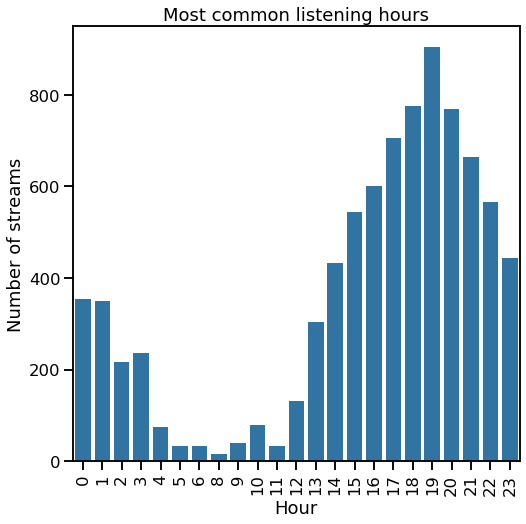

In [464]:
#making a plot with most common listening hours
plt.figure(figsize = (8,8))
col = sb.color_palette()[0]
#order = ['0h','1h','2h','3h','4h','5h','6h','7h','8h','9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h','22h','23h']
sb.countplot(data = days_hours, x ='hour', color = col) #,  order = order)
plt.title('Most common listening hours')
plt.ylabel('Number of streams')
plt.xlabel('Hour')
plt.xticks(rotation = 90);

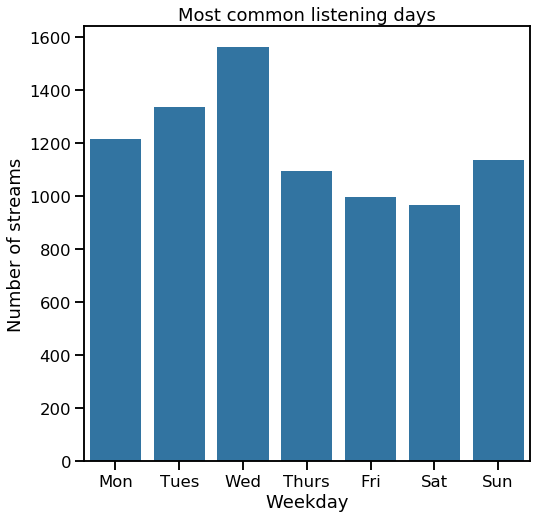

In [485]:
#making a plot with the most commom listening days
plt.figure(figsize = (8,8))
col = sb.color_palette()[0]
#order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
sb.countplot(data = days_hours, x ='weekday', color = col) #order = order)
plt.xticks([0,1,2,3,4,5,6], day_short_names);
plt.title('Most common listening days')
plt.ylabel('Number of streams')
plt.xlabel('Weekday');

In [467]:
data['date']= pd.to_datetime(data['date'])

In [471]:
#pivoting the df and creating another one. We'll use wekkday and hour as index, because this is what
#we want to display in the heatmap
data_df = pd.pivot_table(data[['hour','weekday','minPlayed']], index = ['weekday','hour'], aggfunc = 'count')

In [473]:
#unstacking the data, and filling the NaN values with 0
data_df2 = data_df.unstack(level = 0)
data_df3 = data_df2.fillna(0)
data_df3

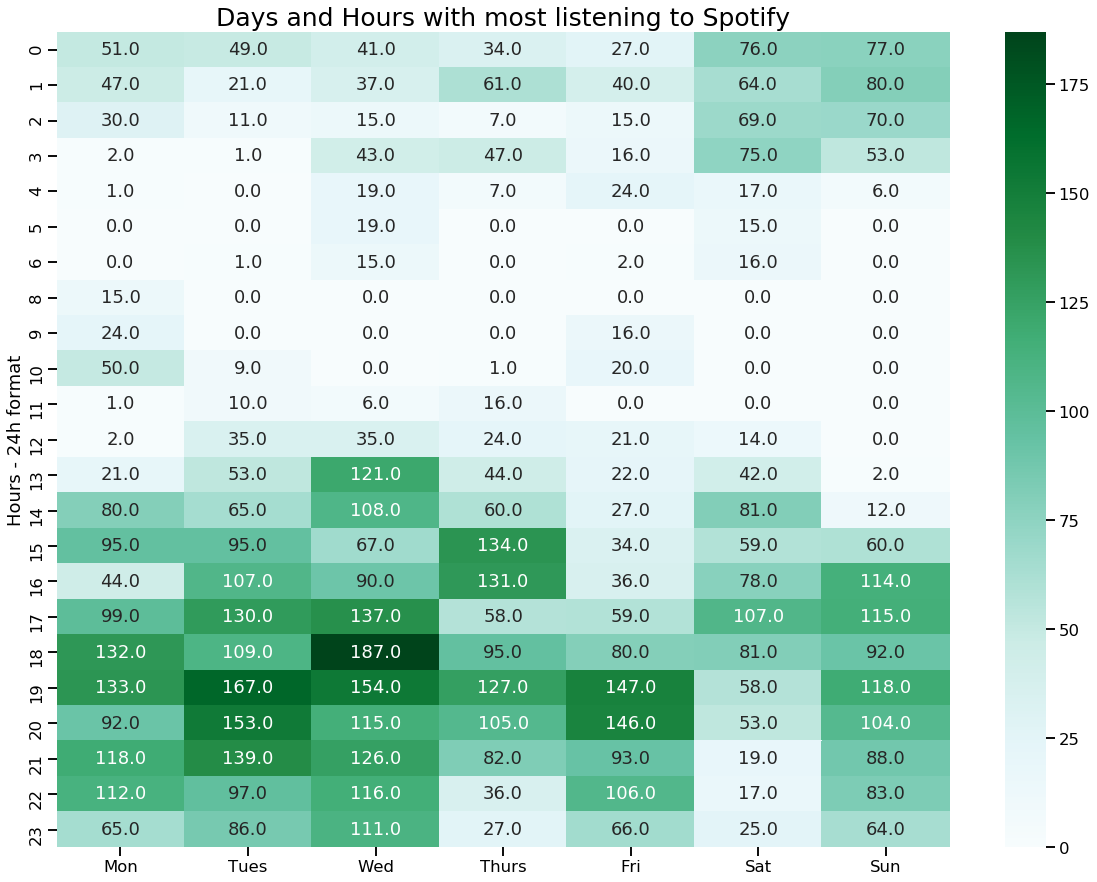

In [495]:
#plotting the heatmap with most listening hours and days
day_short_names = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
plt.figure(figsize = (20,15))
sb.heatmap(data = data_df3, annot = True, cmap = 'BuGn', fmt = '000', xticklabels=day_short_names)
plt.title('Days and Hours with most listening to Spotify', fontsize = 25)
plt.xlabel('')
plt.ylabel('Hours - 24h format');

### Sources

[Heatmap](https://dfrieds.com/data-visualizations/when-use-heatmaps.html)

[Seaborn Documentation](https://seaborn.pydata.org/api.html)

[Changing xticks label](https://www.kite.com/python/answers/how-to-set-tick-labels-with-matplotlib-in-python)

[Matplotlib Documentation](https://matplotlib.org/3.3.3/index.html)

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

[Color Palette](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)